# Phase 1 Project

**Authors:** Jonathan Holt
***

## Overview

### Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I have been charged with exploring what types of films are currently doing the best at the box office, as well as translating those findings into actionable insights.


### The Data

I have been provided with data from several movie tracking websites. The data includes:
- general movie information (title, staff, release date)
- financial data (production budget, gross revenue)
- user and critic ratings

The data is very broad and each data set contains certain data points but none contain all of the data points. My task will be to clean and organize this data into a usable format for gaining insights into the movie industry so that I can make recommendations to Micorosoft.

For this project, I will using the following data:
- Financial Data from The Numbers
- Genre information from IMDB
- Ratings from IMDB


### Questions that I want to answer:
1. What movies are doing well at the box office?
2. What genres should Microsoft make?
3. How much should Microsoft spend on these movies?


## Data Preparation


### Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn') #style that I am using for my visualizations
import seaborn as sns

%matplotlib inline

In [2]:
import glob, os
fpath = 'zippedData/'
os.listdir(fpath)

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [3]:
query = fpath+"*.gz"

file_list=glob.glob(query)
file_list

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [4]:
tables = {}

for file in file_list:
    print('---'*20)
    file_name = file.replace('zippedData/', '').replace('.', '_')
    print(file_name)
    
    
    
    if 'tsv.gz' in file:
        temp_df = pd.read_csv(file, sep= "\t", encoding = "latin-1")
    else:
        temp_df = pd.read_csv(file)
    
    display(temp_df.head(), temp_df.tail())
    tables[file_name] = temp_df

------------------------------------------------------------
imdb_title_crew_csv_gz


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


,tconst,directors,writers
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825
146143,tt9010172,NaN,nm8352242


------------------------------------------------------------
tmdb_movies_csv_gz


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


------------------------------------------------------------
imdb_title_akas_csv_gz


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


,title_id,ordering,title,region,language,types,attributes,is_original_title
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0
331702,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0


------------------------------------------------------------
imdb_title_ratings_csv_gz


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


------------------------------------------------------------
imdb_name_basics_csv_gz


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN
606647,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer",tt8743182


------------------------------------------------------------
rt_reviews_tsv_gz


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


------------------------------------------------------------
imdb_title_basics_csv_gz


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


------------------------------------------------------------
rt_movie_info_tsv_gz


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


------------------------------------------------------------
tn_movie_budgets_csv_gz


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


------------------------------------------------------------
bom_movie_gross_csv_gz


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


------------------------------------------------------------
imdb_title_principals_csv_gz


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


,tconst,ordering,nconst,category,job,characters
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN
1028185,tt9692684,5,nm10441595,producer,producer,NaN


### Formating Cell
I am keeping all of my display commands here so I can easily find them if/when I need
to change anything.

In [5]:
pd.set_option('display.max_rows', 1000)
#change the amount of rows displayed
pd.options.display.float_format = '{:,.0f}'.format 
#This takes the decimal places out of floats. I may need to change this for some of the other features.

### Table Aliases
Setting an alias for each table so that it is easier to use them.

In [7]:
table1 = tables['imdb_title_crew_csv_gz']
table2 = tables['tmdb_movies_csv_gz']
table3 = tables['imdb_title_akas_csv_gz']
table4 = tables['imdb_title_ratings_csv_gz']
table5 = tables['imdb_name_basics_csv_gz']
table6 = tables['rt_reviews_tsv_gz']
table7 = tables['imdb_title_basics_csv_gz']
table8 = tables['rt_movie_info_tsv_gz']
table9 = tables['tn_movie_budgets_csv_gz']
table10 = tables['bom_movie_gross_csv_gz']
table11 = tables['imdb_title_principals_csv_gz']

## Initial Data Cleaning

I will start my data exploration/cleaning with the financial information from The Numbers (table9)

In [146]:
#sorting by worldwide gross
table9.sort_values(by='worldwide_gross', ascending=False).head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279"
42,43,"Dec 19, 1997",Titanic,"200,000,000","659,363,944","2,208,208,395"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"300,000,000","678,815,482","2,048,134,200"
33,34,"Jun 12, 2015",Jurassic World,"215,000,000","652,270,625","1,648,854,864"


Something is wrong here. I assume that it is sorting anything with a '9' in the front first. I presume that the dollar amounts are strings instead of integers. I should also check for null values while I'm checking for this.

In [9]:
table9.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There are no null values, but there are likely placeholders

I will now clean the three financial columns. Removing the $, removing the comma, then converting to float.

In [10]:
cleaned_budget = table9['production_budget'].map(lambda x: x.replace('$',' '))
cleaned_budget = cleaned_budget.map(lambda x: x.replace(',',''))
cleaned_budget = cleaned_budget.astype(float)

cleaned_domestic = table9['domestic_gross'].map(lambda x: x.replace('$',' '))
cleaned_domestic =cleaned_domestic.map(lambda x: x.replace(',',''))
cleaned_domestic = cleaned_domestic.astype(float)

cleaned_worldwide = table9['worldwide_gross'].map(lambda x: x.replace('$',' '))
cleaned_worldwide = cleaned_worldwide.map(lambda x: x.replace(',',''))
cleaned_worldwide = cleaned_worldwide.astype(float)

In [147]:
#Putting my cleaned data into the table.
table9["production_budget"] = cleaned_budget
table9["domestic_gross"] = cleaned_domestic
table9["worldwide_gross"] = cleaned_worldwide
table9 = table9.sort_values(by='worldwide_gross', ascending=False)

#converting release_date to datetime format.
cleaned_release_date = pd.to_datetime(table9['release_date'])
table9['release_date']= cleaned_release_date

#Creating a column 'release_year' to more easily search general release dates, etc.
table9['release_year'] = table9['release_date'].dt.year

table9.head(2)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279",2009,"2,351,345,279",6
42,43,1997-12-19,Titanic,"200,000,000","659,363,944","2,208,208,395",1997,"2,008,208,395",10


**What is the range of release dates in this data set?**

In [148]:
table9.sort_values(by='release_date', ascending=False).tail(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI
5523,24,1916-09-05,Intolerance,"385,907",0,0,1916,"-385,907",-1
5677,78,1915-02-08,The Birth of a Nation,"110,000","10,000,000","11,000,000",1915,"10,890,000",99


In [149]:
table9.sort_values(by='release_date', ascending=False).head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI
194,95,2020-12-31,Moonfall,"150,000,000",0,0,2020,"-150,000,000",-1
1205,6,2020-12-31,Hannibal the Conqueror,"50,000,000",0,0,2020,"-50,000,000",-1


The earliest movie is from 1915. The most recent are from 2020.
- I doubt that I will need data from movies from more than a few decades ago. I will slice out recent movie data as I proceed with my data cleaning.
- The movies from 2020 have no performance data. It will be okay to exclude them from analysis as they aren't relevant.
- The bulk of the data starts in 1996 where there are 100+ movies every year afterward until 2018. There is a little bit of info for 2019.

### Calculating Total Profit and ROI
- The first way that I will be manipulating the cleaned data is to calculate two financial performance metrics: Total Profit, and Return on Investment (ROI)

In [150]:
#creating a column that calculates the profit for each movie. (gross - budget)
total_profit = table9.apply(lambda x: x['worldwide_gross'] - x['production_budget'], axis=1)
table9['total_profit'] = total_profit

#creating a column that calculates ROI for each movie. (Profit divided by budget)
roi = table9.apply(lambda x: x['total_profit'] / x['production_budget'], axis=1)
table9['ROI'] = roi

table9.head(2)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279",2009,"2,351,345,279",6
42,43,1997-12-19,Titanic,"200,000,000","659,363,944","2,208,208,395",1997,"2,008,208,395",10


In [151]:
#A quick snapshot of the information. 
#table9.describe()

## Getting Genre Data
I am happy with where my financial data is at the moment. Now I want to find a way to indentify the **genres** of these movies as that will help me answer the specific question of what ***types*** **of movies should be made.**. 
I will use IMDB Basics (Table 7) to get this data. I need to clean the data and find a way to properly combine it with the financial data that I already have.

In [154]:
table7.sort_values(by='start_year', ascending=True).head(3)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
9599,tt1566491,Brainiacs in La La Land,Brainiacs in La La Land,2010,nan,Comedy
43264,tt2578092,Fireplace for your Home: Crackling Fireplace w...,Fireplace for your Home: Crackling Fireplace w...,2010,61,Music
11550,tt1634300,Role/Play,Role/Play,2010,85,"Drama,Romance"


**Analysis:**
- This data only goes back to 2010. This will still be useful as Microsoft will want current information on
which genres are popular.
- I want to see what other data I can collect from the IMDB datasets before attempting to merge the titles from this dataset with my financial data.
- Many of the IMDB datasets contain a field 'tconst' which will link more data to the genres and titles that I have here.

In [18]:
#merging, using the tconst as a key.
imdb_df = pd.merge(table7, table4, left_on= 'tconst', right_on= 'tconst', how='left')
imdb_df= pd.merge(imdb_df, table1, left_on= 'tconst', right_on= 'tconst', how='left')
imdb_df= pd.merge(imdb_df, table11, left_on= 'tconst', right_on= 'tconst', how='left')
imdb_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers,ordering,nconst,category,job,characters
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",7,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",10,nm0006210,composer,NaN,NaN
1,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",7,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",1,nm0474801,actor,NaN,"[""Kundan S. Prasad"",""Bajrangi""]"
2,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",7,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",2,nm0904537,actress,NaN,"[""Munni"",""Laila-E-Aasmaan""]"


There are a lot of duplicates due to the personnel attached to each movie getting their own record. I doubt that I will need to check the personnel, so let's drop the duplicates.

In [19]:
imdb_df = imdb_df.drop_duplicates('original_title', keep='first')
imdb_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers,ordering,nconst,category,job,characters
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",7,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",10,nm0006210,composer,NaN,NaN
10,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama",7,43,nm0002411,NaN,1,nm0045119,actress,NaN,NaN
17,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama,7,"4,517",nm0000080,"nm0000080,nm0462648",10,nm0613657,editor,NaN,NaN


I am dropping a lot of the other fields as well. If I need them again, I can re-merge them using the tconst. I am dropping: *directors, writers, ordering, nconst, category, job, characters*.

In [20]:
imdb_df = imdb_df.drop(['directors', 'writers', 'ordering', 'nconst', 'category', 'job', 'characters'], axis = 1)
imdb_df.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",7,77
10,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama",7,43


### Merging the Dataframes

I want to now merge this imdb_df with my financial information from The Numbers (table9). I know that if I just do a merge on primary title, some of the results will be incorrect. (Avatar is the top grossing movie but is listed as a horror movie)


In [21]:
#inner join with the indiciator column so I can track where everything is coming from.
merged_originals = pd.merge(table9, imdb_df, left_on= 'movie', right_on= 'original_title', how='left', indicator=True)
merged_originals.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,_merge
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279",2009,"2,351,345,279",6,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only
1,43,1997-12-19,Titanic,"200,000,000","659,363,944","2,208,208,395",1997,"2,008,208,395",10,tt2495766,Titanic,Titanic,"2,012",nan,Adventure,6,20,both
2,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only
3,7,2018-04-27,Avengers: Infinity War,"300,000,000","678,815,482","2,048,134,200",2018,"1,748,134,200",6,tt4154756,Avengers: Infinity War,Avengers: Infinity War,"2,018",149,"Action,Adventure,Sci-Fi",8,"670,926",both
4,34,2015-06-12,Jurassic World,"215,000,000","652,270,625","1,648,854,864",2015,"1,433,854,864",7,tt0369610,Jurassic World,Jurassic World,"2,015",124,"Action,Adventure,Sci-Fi",7,"539,338",both


In [22]:
merged_originals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   release_year       5782 non-null   int64         
 7   total_profit       5782 non-null   float64       
 8   ROI                5782 non-null   float64       
 9   tconst             2330 non-null   object        
 10  primary_title      2330 non-null   object        
 11  original_title     2330 non-null   object        
 12  start_year         2330 non-null   float64       
 13  runtime_minutes    2152 non-null   float64       
 14  genres  

- 5782 records after the join.
- I am going to slice these records into two datasets. One that merged on original title, and everything else that still needs to merge.

In [24]:
correct_merge_df = merged_originals.loc[(merged_originals["_merge"] == "both")]
need_to_merge = merged_originals.loc[(merged_originals["_merge"] != "both")]

In [27]:
need_to_merge.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,_merge
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279",2009,"2,351,345,279",6,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only
2,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only
5,67,2015-04-03,Furious 7,"190,000,000","353,007,020","1,518,722,794",2015,"1,328,722,794",7,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only


#### Dealing with Avatar

In [28]:
correct_merge_df = correct_merge_df.drop(['_merge'], axis=1) #dropping '_merge' so I can continue

Locating Avatar and moving it to the correct_merge_df as I can tell from the release_year, and original_title that the horror movie Avatar is not the one that was the best grossing movie of all time.

In [29]:
avatar = merged_originals.loc[(merged_originals['movie'] == 'Avatar')]
correct_merge_df = correct_merge_df.append(avatar, ignore_index = True)

In [30]:
correct_merge_df.sort_values('total_profit', ascending=False).head(3) 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,_merge
2330,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279",2009,"2,351,345,279",6,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only
0,43,1997-12-19,Titanic,"200,000,000","659,363,944","2,208,208,395",1997,"2,008,208,395",10,tt2495766,Titanic,Titanic,"2,012",nan,Adventure,6,20,NaN
1,7,2018-04-27,Avengers: Infinity War,"300,000,000","678,815,482","2,048,134,200",2018,"1,748,134,200",6,tt4154756,Avengers: Infinity War,Avengers: Infinity War,"2,018",149,"Action,Adventure,Sci-Fi",8,"670,926",NaN


In [31]:
#need to drop the indicator column if I want to use it again.
need_to_merge = need_to_merge.drop(['_merge'], axis=1)

In [158]:
#dropping Avatar as I know that it is not merging correctly.
need_to_merge = need_to_merge.drop()
need_to_merge.head(2)

#### Merging into Project Dataframe
- This is the dataframe that I plan on using for the majority of my analysis.

In [155]:
merged_with_primary.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst_y,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,_merge
0,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,NaN,NaN,NaN,nan,nan,NaN,nan,left_only
1,67,2015-04-03,Furious 7,"190,000,000","353,007,020","1,518,722,794",2015,"1,328,722,794",7,tt2820852,Furious 7,Furious Seven,"2,015",137,"Action,Crime,Thriller",7,both


In [160]:
#merging need_to_merge  with primary name.
merged_with_primary = pd.merge(need_to_merge, imdb_df, left_on= 'movie', right_on= 'primary_title',
                               how='left', indicator=True)
merged_with_primary.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst_x,...,numvotes_x,tconst_y,primary_title_y,original_title_y,start_year_y,runtime_minutes_y,genres_y,averagerating_y,numvotes_y,_merge
0,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,NaN,...,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only
1,67,2015-04-03,Furious 7,"190,000,000","353,007,020","1,518,722,794",2015,"1,328,722,794",7,NaN,...,nan,tt2820852,Furious 7,Furious Seven,"2,015",137,"Action,Crime,Thriller",7,"335,074",both


In [40]:
merged_with_primary = merged_with_primary.drop(merged_with_primary.columns[9:16], axis = 1)
merged_with_primary.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,numvotes_x,tconst_y,primary_title_y,original_title_y,start_year_y,runtime_minutes_y,genres_y,averagerating_y,numvotes_y,_merge
0,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only
1,67,2015-04-03,Furious 7,"190,000,000","353,007,020","1,518,722,794",2015,"1,328,722,794",7,nan,tt2820852,Furious 7,Furious Seven,"2,015",137,"Action,Crime,Thriller",7,"335,074",both
2,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,"125,000,000","381,193,157","1,341,693,157",2011,"1,216,693,157",10,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only


In [41]:
merged_with_primary = merged_with_primary.drop(merged_with_primary.columns[9], axis = 1)
merged_with_primary.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst_y,primary_title_y,original_title_y,start_year_y,runtime_minutes_y,genres_y,averagerating_y,numvotes_y,_merge
0,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only
1,67,2015-04-03,Furious 7,"190,000,000","353,007,020","1,518,722,794",2015,"1,328,722,794",7,tt2820852,Furious 7,Furious Seven,"2,015",137,"Action,Crime,Thriller",7,"335,074",both
2,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,"125,000,000","381,193,157","1,341,693,157",2011,"1,216,693,157",10,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only


In [42]:
#dropping indicator column
merged_with_primary = merged_with_primary.drop(merged_with_primary.columns[16], axis = 1)
merged_with_primary.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst_y,primary_title_y,original_title_y,start_year_y,runtime_minutes_y,genres_y,averagerating_y,_merge
0,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,NaN,NaN,NaN,nan,nan,NaN,nan,left_only
1,67,2015-04-03,Furious 7,"190,000,000","353,007,020","1,518,722,794",2015,"1,328,722,794",7,tt2820852,Furious 7,Furious Seven,"2,015",137,"Action,Crime,Thriller",7,both
2,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,"125,000,000","381,193,157","1,341,693,157",2011,"1,216,693,157",10,NaN,NaN,NaN,nan,nan,NaN,nan,left_only


In [43]:
#Renaming the columns which contain _y
merged_with_primary.rename(columns = {'averagerating_y':'averagerating', 'numvotes_y':'numvotes',
                              'primary_title_y':'primary_title', 'original_title_y':'original_title',
                              'start_year_y': 'start_year', 'runtime_minutes_y': 'runtime_minutes',
                              'genres_y' : 'genres'}, inplace = True)

In [44]:
merged_with_primary.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst_y,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,_merge
0,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,NaN,NaN,NaN,nan,nan,NaN,nan,left_only
1,67,2015-04-03,Furious 7,"190,000,000","353,007,020","1,518,722,794",2015,"1,328,722,794",7,tt2820852,Furious 7,Furious Seven,"2,015",137,"Action,Crime,Thriller",7,both
2,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,"125,000,000","381,193,157","1,341,693,157",2011,"1,216,693,157",10,NaN,NaN,NaN,nan,nan,NaN,nan,left_only


Appending "merged with primary" to correct merge to make project_df.

In [45]:
project_df =  correct_merge_df.append(merged_with_primary, ignore_index=True)
project_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,_merge,tconst_y
0,43,1997-12-19,Titanic,"200,000,000","659,363,944","2,208,208,395",1997,"2,008,208,395",10,tt2495766,Titanic,Titanic,"2,012",nan,Adventure,6,20,NaN,NaN
1,7,2018-04-27,Avengers: Infinity War,"300,000,000","678,815,482","2,048,134,200",2018,"1,748,134,200",6,tt4154756,Avengers: Infinity War,Avengers: Infinity War,"2,018",149,"Action,Adventure,Sci-Fi",8,"670,926",NaN,NaN
2,34,2015-06-12,Jurassic World,"215,000,000","652,270,625","1,648,854,864",2015,"1,433,854,864",7,tt0369610,Jurassic World,Jurassic World,"2,015",124,"Action,Adventure,Sci-Fi",7,"539,338",NaN,NaN
3,27,2012-05-04,The Avengers,"225,000,000","623,279,547","1,517,935,897",2012,"1,292,935,897",6,tt0848228,The Avengers,The Avengers,"2,012",143,"Action,Adventure,Sci-Fi",8,"1,183,655",NaN,NaN
4,4,2015-05-01,Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963",2015,"1,072,413,963",3,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,"2,015",141,"Action,Adventure,Sci-Fi",7,"665,594",NaN,NaN


In [46]:
#dropping the columns that I missed before.
project_df = project_df.drop(project_df[['_merge', 'tconst_y']], axis = 1)
project_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,43,1997-12-19,Titanic,"200,000,000","659,363,944","2,208,208,395",1997,"2,008,208,395",10,tt2495766,Titanic,Titanic,"2,012",nan,Adventure,6,20
1,7,2018-04-27,Avengers: Infinity War,"300,000,000","678,815,482","2,048,134,200",2018,"1,748,134,200",6,tt4154756,Avengers: Infinity War,Avengers: Infinity War,"2,018",149,"Action,Adventure,Sci-Fi",8,"670,926"
2,34,2015-06-12,Jurassic World,"215,000,000","652,270,625","1,648,854,864",2015,"1,433,854,864",7,tt0369610,Jurassic World,Jurassic World,"2,015",124,"Action,Adventure,Sci-Fi",7,"539,338"
3,27,2012-05-04,The Avengers,"225,000,000","623,279,547","1,517,935,897",2012,"1,292,935,897",6,tt0848228,The Avengers,The Avengers,"2,012",143,"Action,Adventure,Sci-Fi",8,"1,183,655"
4,4,2015-05-01,Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963",2015,"1,072,413,963",3,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,"2,015",141,"Action,Adventure,Sci-Fi",7,"665,594"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5782,88,2015-12-01,Brooklyn Bizarre,"500,000",0,0,2015,"-500,000",-1,NaN,NaN,NaN,nan,nan,NaN,nan,nan
5783,44,2007-02-02,Partition,"10,000,000",0,0,2007,"-10,000,000",-1,NaN,NaN,NaN,nan,nan,NaN,nan,nan
5784,76,2014-12-31,America Is Still The Place,"500,000",0,0,2014,"-500,000",-1,NaN,NaN,NaN,nan,nan,NaN,nan,nan
5785,75,2005-12-31,Insomnia Manica,"500,000",0,0,2005,"-500,000",-1,NaN,NaN,NaN,nan,nan,NaN,nan,nan


In [48]:
project_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5787 entries, 0 to 5786
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5787 non-null   int64         
 1   release_date       5787 non-null   datetime64[ns]
 2   movie              5787 non-null   object        
 3   production_budget  5787 non-null   float64       
 4   domestic_gross     5787 non-null   float64       
 5   worldwide_gross    5787 non-null   float64       
 6   release_year       5787 non-null   int64         
 7   total_profit       5787 non-null   float64       
 8   ROI                5787 non-null   float64       
 9   tconst             2330 non-null   object        
 10  primary_title      2430 non-null   object        
 11  original_title     2430 non-null   object        
 12  start_year         2430 non-null   float64       
 13  runtime_minutes    2245 non-null   float64       
 14  genres  

In [47]:
#checking for duplicates
duplicates = project_df[project_df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes


In [50]:
#storing this df as project_df_master to keep all of this data safe before I start slicing out what I need.
project_df_master = project_df

#### Cleaning the genre data

The genres that I got from the IMDB dataset are still a set of strings contianed in a single field. I need to split them out into three seperate cells so that I can properly analyze them.

In [52]:
project_df[['genre_1', 'genre_2', 'genre_3']] = project_df['genres'].str.split(pat=",", expand=True)

#adding my new genre columns to the master df
project_df_master = project_df

In [ ]:
#adding my new genre columns to the master df
#project_df_master = project_df

In [53]:
project_df_master.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_1,genre_2,genre_3
0,43,1997-12-19,Titanic,"200,000,000","659,363,944","2,208,208,395",1997,"2,008,208,395",10,tt2495766,Titanic,Titanic,"2,012",nan,Adventure,6,20,Adventure,None,None
1,7,2018-04-27,Avengers: Infinity War,"300,000,000","678,815,482","2,048,134,200",2018,"1,748,134,200",6,tt4154756,Avengers: Infinity War,Avengers: Infinity War,"2,018",149,"Action,Adventure,Sci-Fi",8,"670,926",Action,Adventure,Sci-Fi
2,34,2015-06-12,Jurassic World,"215,000,000","652,270,625","1,648,854,864",2015,"1,433,854,864",7,tt0369610,Jurassic World,Jurassic World,"2,015",124,"Action,Adventure,Sci-Fi",7,"539,338",Action,Adventure,Sci-Fi


## Initial Data Analysis

Slicing out the columns that I want to use for my analysis.

In [54]:
project_analysis_df = project_df_master[['movie','release_year', 'production_budget', 'total_profit', 'ROI',
                                       'averagerating', 'numvotes','runtime_minutes', 'genre_1', 'genre_2',
                                        'genre_3', ]]
project_analysis_df.head(3)

,movie,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes,genre_1,genre_2,genre_3
0,Titanic,1997,"200,000,000","2,008,208,395",10,6,20,nan,Adventure,None,None
1,Avengers: Infinity War,2018,"300,000,000","1,748,134,200",6,8,"670,926",149,Action,Adventure,Sci-Fi
2,Jurassic World,2015,"215,000,000","1,433,854,864",7,7,"539,338",124,Action,Adventure,Sci-Fi


### Analysis of the Project Dataframe
- using **.info** and **.describe** methods to get a snapshot of the data contained in my project_analysis dataframe.

In [55]:
project_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5787 entries, 0 to 5786
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              5787 non-null   object 
 1   release_year       5787 non-null   int64  
 2   production_budget  5787 non-null   float64
 3   total_profit       5787 non-null   float64
 4   ROI                5787 non-null   float64
 5   averagerating      2111 non-null   float64
 6   numvotes           2021 non-null   float64
 7   runtime_minutes    2245 non-null   float64
 8   genre_1            2404 non-null   object 
 9   genre_2            1863 non-null   object 
 10  genre_3            1300 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 497.4+ KB


In [56]:
project_analysis_df.describe()

,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes
count,"5,787","5,787","5,787","5,787","2,111","2,021","2,245"
mean,"2,004","31,578,160","59,903,032",4,6,"87,954",102
std,13,"41,795,575","146,033,169",30,1,"150,063",22
min,"1,915","1,100","-200,237,650",-1,2,5,1
25%,"2,000","5,000,000","-2,185,710",-1,6,"1,680",90
50%,"2,007","17,000,000","8,585,503",1,6,"32,327",101
75%,"2,012","40,000,000","61,053,888",3,7,"105,279",114
max,"2,020","425,000,000","2,351,345,279","1,799",9,"1,841,066",189


**Project Analysis dataframe:**

- Contains **financial data** from The Numbers and **genres** and **ratings** from IMDB.
- 5787 movies in this dataset
- 2111 have ratings and genre information
- Earliest movie is 1915.
- Most recent movie is 2020.

**Next Steps:**
- Recent data will be the most useful, so I will slice out the last 30-40 years of financial data.
- However, I only have genre data for the years 2010-2019, so **I will be limited to that for genre analysis.**
- It would also be beneficial to look at the data in 10 year slices to analyze trends.
- Also remove movies that are too new to have relevent data. (ex. 2020 movies that have a budget but no revenue)

### Analysis of Recent Movies (2000-2019)

In [57]:
#creating recent_movies which contains all movies since 2000.
recent_movies = project_analysis_df
recent_movies = recent_movies[recent_movies['release_year'] >= 2000]
recent_movies = recent_movies[recent_movies['release_year'] < 2020]
recent_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4387 entries, 1 to 5786
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              4387 non-null   object 
 1   release_year       4387 non-null   int64  
 2   production_budget  4387 non-null   float64
 3   total_profit       4387 non-null   float64
 4   ROI                4387 non-null   float64
 5   averagerating      1966 non-null   float64
 6   numvotes           1902 non-null   float64
 7   runtime_minutes    2050 non-null   float64
 8   genre_1            2153 non-null   object 
 9   genre_2            1731 non-null   object 
 10  genre_3            1233 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 411.3+ KB


In [58]:
recent_movies.describe()

,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes
count,"4,387","4,387","4,387","4,387","1,966","1,902","2,050"
mean,"2,009","34,458,994","62,507,732",2,6,"90,709",103
std,5,"45,470,758","153,386,325",13,1,"150,633",22
min,"2,000","1,100","-200,237,650",-1,2,5,1
25%,"2,005","5,000,000","-2,325,372",-1,6,"3,004",91
50%,"2,009","18,000,000","7,747,682",1,6,"36,004",101
75%,"2,014","43,000,000","63,175,527",2,7,"107,919",114
max,"2,019","425,000,000","2,351,345,279",431,9,"1,841,066",189


**Recent Movies (2000 - 2019):**
- There are 4,387 movies, which is a good sample size.
- Nearly half of them have genre information (but all are from 2010-2019)
- A movie needs to be near the median to make a profit.
- The median and the mean are very different. I need to look for outliers.
- The better performing movies have a slightly higher averagerating and longer average runtime.


## Questions to Answer

Now that I have pulled recent movies (2000 - 2019) from my analysis dataframe. I can set out to answer my key questions.

1. How do we determine what a successful movie is?
2. Which genres have been the most successful recently?
3. Which of these genres should Microsoft pursue?
4. How much should Microsoft budget for the movies they produce?

### Question 1: Measuring Success
I am going to use the 2010-2019 dataset as it contains the genre data that I want to use to answer future questions. I will slice out the most successful movies.
The two metrics that I will be using are **total profit and return on investment (ROI)**
I will then slice out the top 500 movies as that is roughly the top quartile for this dataset.
**These movies would be good for Microsoft to emulate as we want to be as successful as possible.**

In [59]:
recent_movies_2010 = recent_movies[recent_movies['release_year'] >= 2010]
recent_movies_2000 = recent_movies[recent_movies['release_year'] < 2010]

In [60]:
recent_movies_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191 entries, 1 to 5784
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2191 non-null   object 
 1   release_year       2191 non-null   int64  
 2   production_budget  2191 non-null   float64
 3   total_profit       2191 non-null   float64
 4   ROI                2191 non-null   float64
 5   averagerating      1785 non-null   float64
 6   numvotes           1747 non-null   float64
 7   runtime_minutes    1804 non-null   float64
 8   genre_1            1838 non-null   object 
 9   genre_2            1571 non-null   object 
 10  genre_3            1132 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 205.4+ KB


In [61]:
recent_movies_2010.describe()

,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes
count,"2,191","2,191","2,191","2,191","1,785","1,747","1,804"
mean,"2,014","36,454,786","75,591,780",2,6,"98,036",105
std,3,"51,512,399","177,114,582",11,1,"154,717",19
min,"2,010","1,400","-200,237,650",-1,2,5,6
25%,"2,012","4,500,000","-2,000,000",-1,6,"6,440",93
50%,"2,014","16,000,000","8,495,213",1,6,"41,782",103
75%,"2,016","42,000,000","71,463,116",3,7,"117,674",116
max,"2,019","410,600,000","1,748,134,200",416,9,"1,841,066",189


#### Answer: Metrics Microsoft should aim for

**Based on 2010 - 2019 releases. To be successful (on average):**
- **Need to be near the top 50% to get a return on investement**.
- If in the top 50%, the **expected budget should be 20 - 40 million dollars, with a expected profit range of 10 - 70 million dollars**.
- The IMDB **ratings seem to be "good, not great" at 6-7 out of 10**, although the movies in the top quartile have a higher average (barely)
- I have genre information for most movies in this dataset, so it is what I will use for all genre analysis.
- This is fine because **Microsoft will want the most recent data about which genres have been successful.**
- Roughly 2200 movies in this dataframe after the split.

#### What happens Microsoft doesn't succeed?

While we are looking at successful movies for Microsoft to emulate, **it is also helpful to look at the movies that didn't do well**. My metric for this is movies that lost money.

In [64]:
#movies that did not make a profit
loss_df= recent_movies_2010.sort_values('total_profit', ascending=True)
loss_df = loss_df[0:800]

In [66]:
loss_df.describe()

,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes
count,800,800,800,800,605,581,615
mean,"2,014","16,705,714","-9,391,128",-1,6,"22,858",102
std,2,"27,798,340","14,906,225",0,1,"38,011",19
min,"2,010","200,000","-200,237,650",-1,2,6,6
25%,"2,012","2,000,000","-11,205,269",-1,5,882,90
50%,"2,014","7,500,000","-4,449,910",-1,6,"7,060",99
75%,"2,015","20,000,000","-1,416,352",-1,7,"33,603",110
max,"2,019","350,000,000","-187,625",-0,9,"403,755",177


Analysis:
- 800 movies from our data set (out of 2200) lost money.
- The **budgets on these movies seem to be smaller** than it is for profitable movies at **8 to 20 million dollars** on the high end (but with at least one going all the way up to 350 million!)
- While I'm sure it's possible to lose more money that you have already spent due to marketing, etc, **based on the data that I have, the most money that a movie can lose is it's production budget**. Perhaps this is why these movies tend to have lower budgets. Maybe the studios know that there is more risk and therefore a greater chance of losing money and therefore don't want to invest as much.

### Question 2: Which Genres have been the most successful?

**What genres correspond to the most profitable movies as well as the movies with the best ROI?**

I will use the 2010-2019 dataset for this analysis as it has the most complete genre information.
Since a movie can have multiple genres, I will do value counts for each of the 3 genre columns, and then do value counts to determine how many times each genre is associated with each dataset.

#### Genre Analysis
- I am creating variables that I can use to analyze Genres using the metrics for success that I identified earlier.
- I am also going to create a function that gets the value counsts of each genre type.

In [67]:
#creating variables
profit_df= recent_movies_2010.sort_values('total_profit', ascending=False) #all recent movies ranked by profit.
roi_df = recent_movies_2010.sort_values('ROI', ascending=False) #all recent movies ranked by ROI.
top_profit = profit_df[0:500] #Top 500 movies by Total Profit
all_profit = profit_df[0:1250] #all movies that made a profit. (top 1250)
top_roi = roi_df[0:500] # top 500 movies by ROI.

In [68]:
#creating function
def genre_df(df): #gets the value counts of the genre columns in a dataframe
    genre_df = df[['genre_1', 'genre_2' , 'genre_3']]
    genre_counts= genre_df.apply(pd.Series.value_counts)
    genre_df = genre_counts.fillna(0)
    genre_df['total'] = genre_counts.sum(axis=1)
    genre_df = genre_df.reset_index()
    return genre_df

Using my genre_df function to get the genres associated with profitable movies (top 500 profit), as well as movies that lost money.

In [69]:
loss_genre_df = genre_df(loss_df)
loss_genre_df = loss_genre_df.reset_index()
loss_genre_df = loss_genre_df.drop(loss_genre_df[['level_0','genre_1', 'genre_2', 'genre_3']], axis=1)
loss_genre_df = loss_genre_df.sort_values('total', ascending=False)
loss_genre_df.head()

,index,total
7,Drama,357
4,Comedy,170
0,Action,155
18,Thriller,117
5,Crime,117


In [70]:
#These are the genres from the 500 most profitable movies from 2010-2019
genre_df_profit = genre_df(top_profit)
genre_df_profit = genre_df_profit.sort_values('total', ascending=False)
genre_df_profit = genre_df_profit.drop(genre_df_profit[['genre_1', 'genre_2', 'genre_3']], axis=1)

genre_df_profit.head()

,index,total
1,Adventure,202
0,Action,195
4,Comedy,160
7,Drama,121
18,Thriller,72


Creating a Genre Dataframe for all movies in the dataset.

In [71]:
#Genre DF for ALL movies from dataset 
genre_df_2010 = genre_df(recent_movies_2010)
genre_df_2010 = genre_df_2010.drop(genre_df_2010[['genre_1', 'genre_2', 'genre_3']], axis=1)
genre_df_2010 = genre_df_2010.sort_values('total', ascending = False)
genre_df_2010

,index,total
7,Drama,902
4,Comedy,597
0,Action,493
1,Adventure,387
18,Thriller,321
5,Crime,276
11,Horror,231
15,Romance,229
3,Biography,158
16,Sci-Fi,156


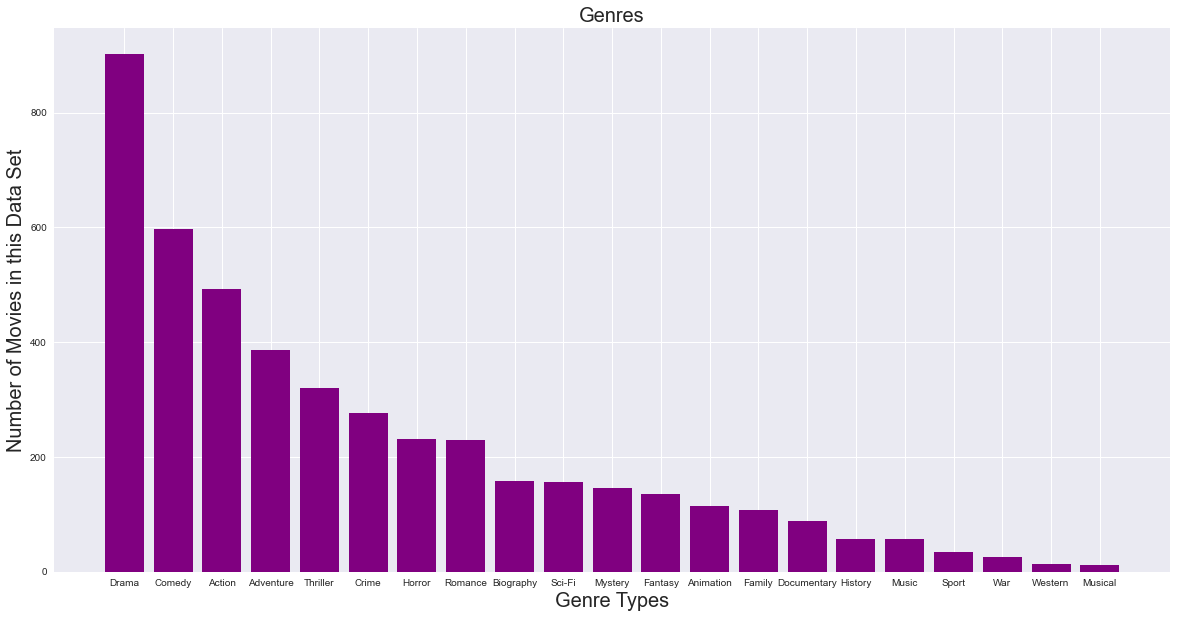

In [136]:
df = genre_df_2010

fig, ax = plt.subplots(figsize = (20,10))

ax.bar(x=df['index'], height=df['total'],  color='purple')


ax.set_xlabel('Genre Types', size=20)
ax.set_ylabel('Number of Movies in this Data Set', size=20)
ax.set_title('Genres', size=20);

In [72]:
#These are the genres from ALL profitable movies from 2010-2019

genre_df_all_profit = genre_df(all_profit)
genre_df_all_profit = genre_df_all_profit.drop(genre_df_all_profit[['genre_1', 'genre_2', 'genre_3']], axis=1)
genre_df_all_profit = genre_df_all_profit.sort_values('total', ascending=False)

genre_df_all_profit.head()

,index,total
7,Drama,476
4,Comedy,399
0,Action,332
1,Adventure,301
18,Thriller,180


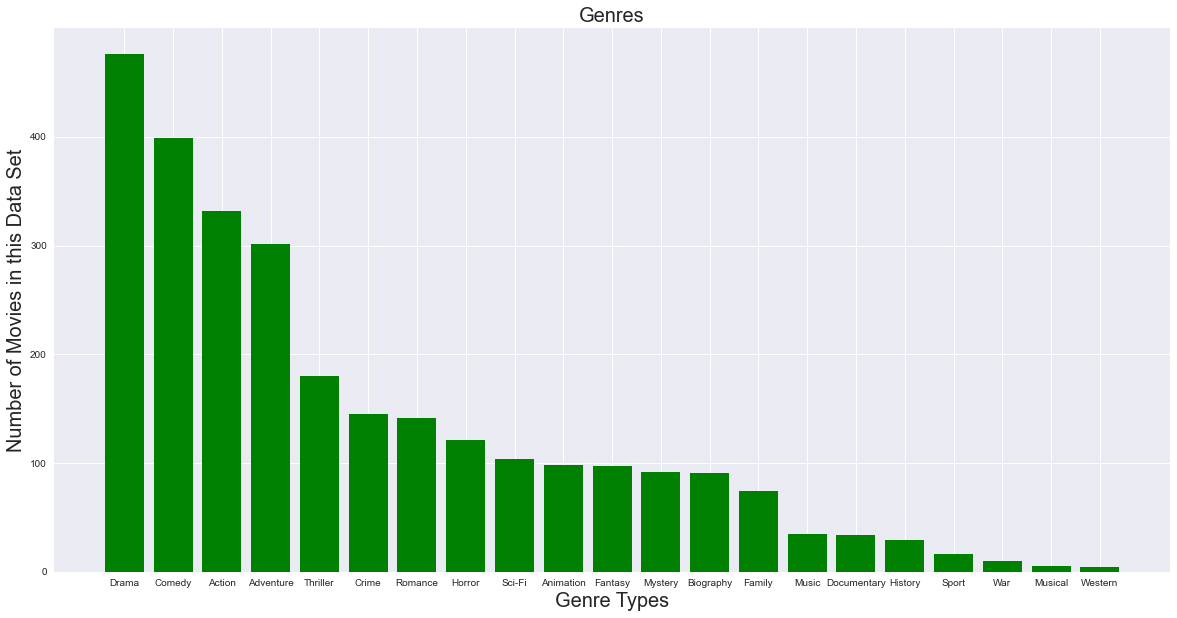

In [137]:
df = genre_df_all_profit

fig, ax = plt.subplots(figsize = (20,10))

ax.bar(x=df['index'], height=df['total'],  color='green')


ax.set_xlabel('Genre Types', size=20)
ax.set_ylabel('Number of Movies in this Data Set', size=20)
ax.set_title('Genres', size=20);

In [73]:
#These are the genres from the 500 movies with the best ROI from 2010-2019
genre_df_roi = genre_df(top_roi)
genre_df_roi = genre_df_roi.sort_values('total', ascending=False)
genre_df_roi = genre_df_roi.drop(genre_df_roi[['genre_1', 'genre_2', 'genre_3']], axis=1)
genre_df_roi.head(3)

,index,total
7,Drama,199
4,Comedy,152
0,Action,104


#### Genre Top Profit & ROI

In [75]:
#Genres that are associated with the Top 500 most profitable movies and/or the 500 movies with the best ROI.

genre_df_merged = pd.merge(genre_df_profit, genre_df_roi, on= 'index', how='left')
genre_df_merged = genre_df_merged.rename(columns={'total_x': 'profit_genres', 'total_y': 'roi_genres'})
genre_df_merged.sort_values('roi_genres', ascending=False)
genre_df_merged

,index,profit_genres,roi_genres
0,Adventure,202,101
1,Action,195,104
2,Comedy,160,152
3,Drama,121,199
4,Thriller,72,79
5,Sci-Fi,72,48
6,Animation,70,37
7,Fantasy,46,27
8,Crime,40,39
9,Horror,39,72


In [76]:
genre_df_merged.sort_values('roi_genres', ascending=False)

,index,profit_genres,roi_genres
3,Drama,121,199
2,Comedy,160,152
1,Action,195,104
0,Adventure,202,101
4,Thriller,72,79
9,Horror,39,72
10,Romance,39,62
11,Mystery,35,55
5,Sci-Fi,72,48
13,Biography,29,40


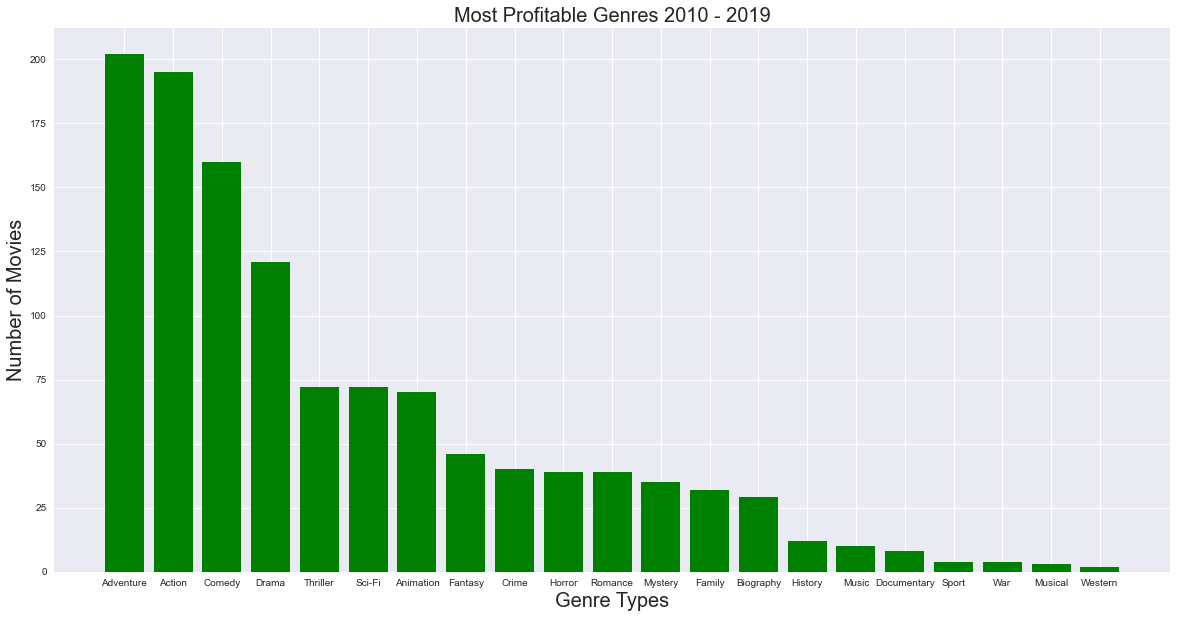

In [109]:
df = genre_df_merged

fig, ax = plt.subplots(figsize = (20,10))

ax.bar(x=df['index'], height=df['profit_genres'],  color="green")

ax.set_xlabel('Genre Types', size=20)
ax.set_ylabel('Number of Movies', size=20)
ax.set_title('Most Profitable Genres 2010 - 2019', size=20);


#### Answer: Top Performaning Genres
- **Adventure, Action, Drama and Comedy** are at the top of both lists.
-**Thriller is the 5th genre on both list, but considerably lower than the other 4.**
- **Sci-fi and Animation** are the next tier for profit.
- **Horror, Romance, and Mystery** have a higher ROI than most other genres.

This information tells us how many of the top profit and ROI movies are classified as each genre.**However, the data does NOT tell us how many of each type of movie is being made, and how many are unsuccessful. We will need to to dig further to uncover that information.**

However, **this data set does accurately show which genres were successful in the time period that we have data for**. So it's safe to assume that these are the most popular genres being made, answering question 2.




### Genre Success Rate
- Let's find out how successful each genre is when you also take into consideration how many movies of that genre did not meet our success metrics.

In [77]:
#function for determining success rate

def success_rate_df(df):
    success_rate = df.apply(lambda x: x['Profit'] / x['Total'], axis=1)
    df['success_rate'] = success_rate
    df['success_rate'] = df['success_rate'].map("{:.2%}".format)
    df = df.sort_values('success_rate', ascending=False)


**The first hurdle that we want to clear is making sure that the movie doesn't lose money.**

In [116]:
#Comparing genres of ALL profitable movies from 2010 df with genres of movies that lost money.

genre_comparison_df_2 = pd.merge(genre_df_all_profit, loss_genre_df, on='index', how='inner')
genre_comparison_df_2 = genre_comparison_df_2.rename(columns={"total_x": "Profit", "total_y": "Loss"})
total_genre_count_2 = genre_comparison_df_2.apply(lambda x: x['Profit'] + x['Loss'], axis=1)
genre_comparison_df_2['Total'] = total_genre_count_2
genre_comparison_df_2['Difference'] = genre_comparison_df_2.apply(lambda x: x['Profit'] - x['Loss'], axis=1)

success_rate_df(genre_comparison_df_2)
genre_comparison_df_2 = genre_comparison_df_2.sort_values('success_rate',ascending=False)
genre_comparison_df_2

,index,Profit,Loss,Total,Difference,success_rate
9,Animation,98,17,115,81,85.22%
3,Adventure,301,81,382,220,78.80%
10,Fantasy,97,34,131,63,74.05%
13,Family,74,28,102,46,72.55%
8,Sci-Fi,104,43,147,61,70.75%
1,Comedy,399,170,569,229,70.12%
2,Action,332,155,487,177,68.17%
11,Mystery,92,46,138,46,66.67%
14,Music,35,18,53,17,66.04%
6,Romance,141,73,214,68,65.89%


**Not losing money is good. But let's look at the top performing movies, so Microsoft can emulate the most successful examples**

In [117]:
#Comparing genres of top 500 profitable movies from 2010 df with genres of movies that lost money.

genre_comparison_df = pd.merge(genre_df_profit, loss_genre_df, on='index', how='inner')
genre_comparison_df = genre_comparison_df.rename(columns={"total_x": "Profit", "total_y": "Loss"})
total_genre_count = genre_comparison_df.apply(lambda x: x['Profit'] + x['Loss'], axis=1)
genre_comparison_df['Total'] = total_genre_count
success_rate = genre_comparison_df.apply(lambda x: x['Profit'] / x['Total'], axis=1)
genre_comparison_df['success_rate'] = success_rate
genre_comparison_df['success_rate'] = genre_comparison_df['success_rate'].map("{:.2%}".format)
genre_comparison_df = genre_comparison_df.sort_values('success_rate', ascending=False)
genre_comparison_df['Difference'] = genre_comparison_df.apply(lambda x: x['Profit'] - x['Loss'], axis=1)

genre_comparison_df

,index,Profit,Loss,Total,success_rate,Difference
6,Animation,70,17,87,80.46%,53
0,Adventure,202,81,283,71.38%,121
5,Sci-Fi,72,43,115,62.61%,29
7,Fantasy,46,34,80,57.50%,12
1,Action,195,155,350,55.71%,40
12,Family,32,28,60,53.33%,4
2,Comedy,160,170,330,48.48%,-10
11,Mystery,35,46,81,43.21%,-11
4,Thriller,72,117,189,38.10%,-45
15,Music,10,18,28,35.71%,-8


In [131]:
genre_comparison_df_dif = genre_comparison_df.sort_values('Difference', ascending=False)
genre_comparison_df_dif

genre_comparison_df_2_dif = genre_comparison_df_2.sort_values('Difference', ascending=False)

#### Bar Graph - Profitable Movies Among Genres

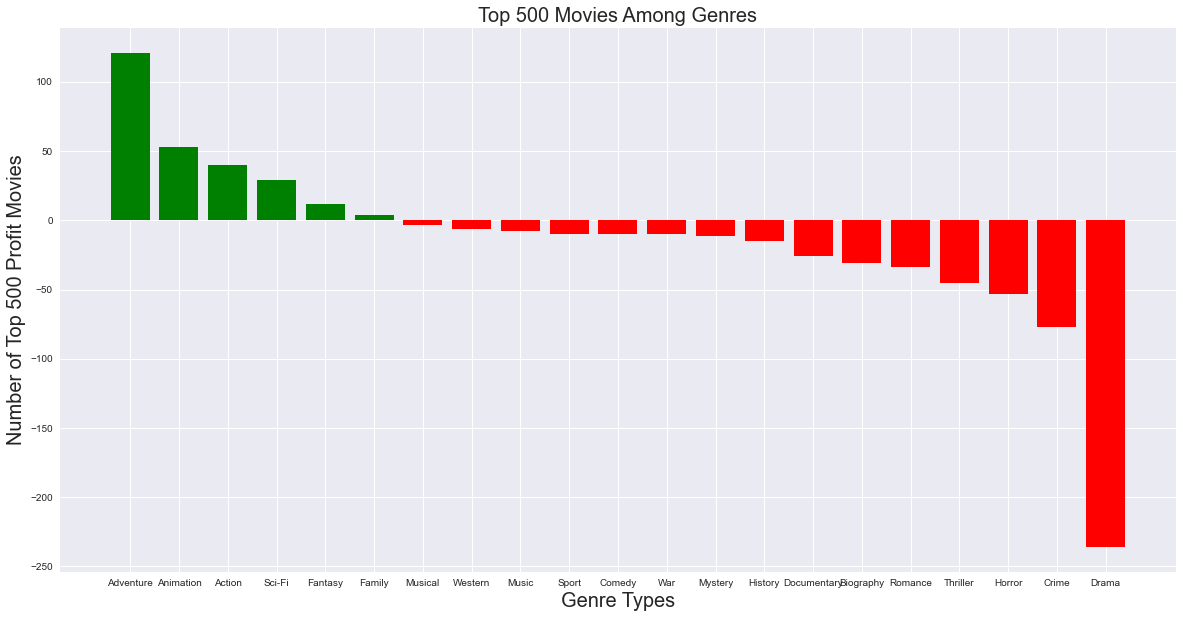

In [130]:
df = genre_comparison_df_dif

fig, ax = plt.subplots(figsize = (20,10))

ax.bar(x=df['index'], height=df['Difference'],  color=(df['Difference'] >= .50).map({True: 'g',
                                                    False: 'r'}))


ax.set_xlabel('Genre Types', size=20)
ax.set_ylabel('Number of Top 500 Profit Movies', size=20)
ax.set_title('Top 500 Movies Among Genres', size=20);

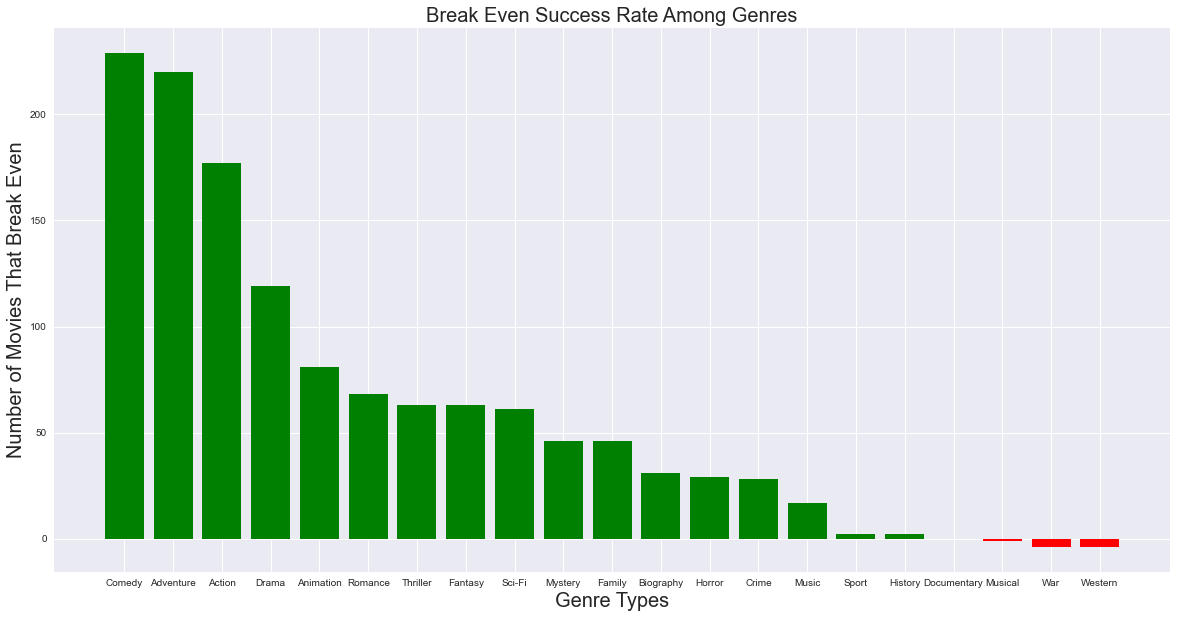

In [132]:
df = genre_comparison_df_2_dif

fig, ax = plt.subplots(figsize = (20,10))

ax.bar(x=df['index'], height=df['Difference'],  color=(df['Difference'] >= .50).map({True: 'g',
                                                    False: 'r'}))


ax.set_xlabel('Genre Types', size=20)
ax.set_ylabel('Number of Movies That Break Even', size=20)
ax.set_title('Break Even Success Rate Among Genres', size=20);

In [81]:
genre_success_df = genre_comparison_df
genre_success_df = genre_success_df.drop(genre_success_df[['Profit', 'Loss', 'Total']], axis=1)
genre_success_df['top_500_success_rate'] = genre_success_df['success_rate']

genre_success_df_2 = genre_comparison_df_2
genre_success_df_2 = genre_success_df_2.drop(genre_success_df_2[['Profit', 'Loss', 'Total']], axis=1)
genre_success_df_2['break_even_success_rate'] = genre_success_df_2['success_rate']

genre_success_combined = pd.merge(genre_success_df, genre_success_df_2, on='index', how='inner')
genre_success_combined = genre_success_combined.drop(genre_success_combined[['success_rate_x', 'success_rate_y']], axis=1)
genre_success_combined



,index,top_500_success_rate,break_even_success_rate
0,Animation,80.46%,85.22%
1,Adventure,71.38%,78.80%
2,Sci-Fi,62.61%,70.75%
3,Fantasy,57.50%,74.05%
4,Action,55.71%,68.17%
5,Family,53.33%,72.55%
6,Comedy,48.48%,70.12%
7,Mystery,43.21%,66.67%
8,Thriller,38.10%,60.61%
9,Music,35.71%,66.04%


### Genre Performance DataFrame

In [82]:
genre_performance_df = pd.merge(genre_success_combined, genre_df_merged, on= 'index', how='left')
genre_performance_df['total_in_top_500_profit'] = genre_performance_df['profit_genres']
genre_performance_df['total_in_top_500_roi'] = genre_performance_df['roi_genres']
genre_performance_df = genre_performance_df.drop(genre_performance_df[['profit_genres', 'roi_genres']], axis=1)

genre_performance_df

,index,top_500_success_rate,break_even_success_rate,total_in_top_500_profit,total_in_top_500_roi
0,Animation,80.46%,85.22%,70,37
1,Adventure,71.38%,78.80%,202,101
2,Sci-Fi,62.61%,70.75%,72,48
3,Fantasy,57.50%,74.05%,46,27
4,Action,55.71%,68.17%,195,104
5,Family,53.33%,72.55%,32,19
6,Comedy,48.48%,70.12%,160,152
7,Mystery,43.21%,66.67%,35,55
8,Thriller,38.10%,60.61%,72,79
9,Music,35.71%,66.04%,10,16


In [84]:
#success rate of the top 500 most profitable movies from 2010-2019
genre_performance_success_1 = genre_performance_df.sort_values('top_500_success_rate', ascending=False)

#success rate of all profitable movies from 2010-2019
genre_performance_success_2 = genre_performance_df.sort_values('break_even_success_rate', ascending=False)

# number of movies in the top 500 most profitable movies from 2010-2019
genre_performance_500_profit = genre_performance_df.sort_values('total_in_top_500_profit', ascending=False)

# number of movies in the top 500 ROI from 2010-2019
genre_performance_500_roi = genre_performance_df.sort_values('total_in_top_500_roi', ascending=False)

### Recommendations
- We can now analyze all this data and come up with some concrete recommendations.
- Let's start by looking at the genres that are associated with the top profit earners from 2010-2019.

In [ ]:
genre_performance_500_profit

**Analysis: Adventure Movies are the best bet!**
- Sorting by top profit shows that **nearly half** of the top 500 most profitable movies were **Adventure** movies.
- Also important to see that **Adventure** movies have the **Second Highest Success Rate at 71 percent*
- By this criteria, **Adventure movies are the top genre that I recommend that Microsoft pursue.**
|

**The other top profit genres:**
- **Action** and **Comedy** also have relatively high rates of success in generating a profit.
-  While fewer of these movies make it into the top 500. I'd classify them as a **safe bet**, and recommend that Microsoft pursue them as well.
- As for **Drama**, while there is still a greater than 50% chance of making money, it is in the **bottom 5 genres in top 500 success rate**  This is because many, many, Drama movies made each year, and when one is a hit, it is a big hit! **BUT** most Drama films aren't super profitable, and nearly half don't make any money. They are also the genre that does best on ROI, so they are presumably cheaper to make than other genres. Still, **I recommend that Microsoft stay away from Drama movies.**


Other Genres with high success rates:
- **Animation** has the **highest success** rate to make money of any genre at 80%. Successful Animation films are profitable, and you're almost guaranteed to not lose money. **This is another top genre for Microsoft.**
- **Sci-Fi**, **Fantasy**, and to a lesser extent **Family** movies all have really strong success rates. Add these to the **safe bets**.

Middle of the road:
- **Mystery, Music, Romance, Thrillers, and Biographies** have a decent chance of making money, and there is a possibility that they can crack the top 500. 

Return on Investment:
- **Comedy, Action, and Adventure** all have a really high ROI. This is more support for pursuing these movies.
- **Thrillers, Horror, Romance, and Mystery** also have good ROI potential.

Avoid at all costs!
- **Westerns, War Movies, Musicals (different than Music movies)** are bad investments on every one of these metrics. Yes, there is a chance that they can be successful, but it would be smarter to focus elsewhere with genres that have more potential to make a lot of money.


### How much should Microsoft spend on these movies?

In [85]:
roi_budget_df = top_roi.sort_values('production_budget', ascending=True)
low_budget_roi = roi_budget_df[0:150] #the 150 lowest budget movies in the top 500 ROI

high_budget_roi = roi_budget_df.sort_values('production_budget', ascending=False)
high_budget_roi = high_budget_roi[0:150] #the 150 highest budget movies in the top 500 ROI


In [86]:
#These are the genres for the 150 highest budget movies out of the top 500 ROI
high_budget_genres = genre_df(high_budget_roi)
high_budget_genres = high_budget_genres.reset_index()
high_budget_genres = high_budget_genres.sort_values('total', ascending=False)
high_budget_genres = high_budget_genres.drop(high_budget_genres[['level_0', 'genre_1', 'genre_2',
                                                                'genre_3']], axis=1)

In [87]:
#These are the genres for the 150 lowest budget movies out of the top 500 ROI
low_budget_genres = genre_df(low_budget_roi)
low_budget_genres = low_budget_genres.reset_index()
low_budget_genres = low_budget_genres.drop(low_budget_genres[['level_0', 'genre_1', 'genre_2',
                                                                'genre_3']], axis=1)
low_budget_genres = low_budget_genres.sort_values('total', ascending=False)


In [88]:
high_budget_genres

,index,total
1,Adventure,83
0,Action,72
4,Comedy,47
2,Animation,34
15,Sci-Fi,29
6,Drama,25
17,Thriller,18
8,Fantasy,14
7,Family,11
5,Crime,10


In [89]:
genre_budget_rank_df = pd.merge(high_budget_genres, low_budget_genres, on= 'index', how='left')
genre_budget_rank_df['high_budget'] = genre_budget_rank_df['total_x']
genre_budget_rank_df['low_budget'] = genre_budget_rank_df['total_y']
genre_budget_rank_df = genre_budget_rank_df.drop(genre_budget_rank_df[['total_x', 'total_y',]], axis=1)



#### Analysis
- Looking at the **500 Top ROI movies**, I tried to determine which genres had the lowest budgets of those successful movies. I did the same to see which had the highest budgets. 
- I used ROI, because Microsoft will want to have the potentional to get the most money back for the money that they spend.

**Big Budget**
- **Action, Adventure, and Animation** are at the top of the high budget list. **I recommend that Microsoft put considerable funds into movies in these genres.**
- **Sci-Fi and Fantasy** will likely need large budgets as well. 

**Low Budget**
- **Drama and Horror** are the very top of the list. Low budget, high ROI, **why didn't I recommend these genres?** Yes, they both have a chance of being a home run, but with Microsoft entering the movie business for the first time, I still recommend a more conservative strategy than looking for the rare low budget Drama or Horror movie that hits it big.
- **Mystery and Romance** are my low budget recommendations. These genres have a decent chance of being highly profitable even with a modest budget.

**Both!**
- There are a few genres that are high in both categories. For these genres, a mix of high budget and low budget could work.
- Try this strategy with: **Comedies & Thrillers**

In [90]:
genre_budget_rank_df.sort_values('low_budget', ascending=False)

,index,high_budget,low_budget
5,Drama,25,71
14,Horror,2,40
2,Comedy,47,31
6,Thriller,18,30
11,Mystery,7,29
13,Romance,3,24
4,Sci-Fi,29,9
10,Biography,8,8
1,Action,72,7
7,Fantasy,14,7


### Give Me a Dollar Amount!

In [ ]:
low_budget_roi.describe()

In [ ]:
high_budget_roi.describe()

High Budget Genres:
- Based on the data from the 2010-2019 ROI dataframe, I would estimate a **110 - 170 million dollar budget**, with **profits in the 500 million to 750 million dollar range**. Expect a **ROI of 4 to 6**.

Low Budget Genres:
- Budgets of ** 3 to 5 million dollars** with expected **profits between 22 and 42 million dollars** with a **ROI of 8 to 15**.

## Evaluation
Evaluate how well your work solves the stated business problem.

Questions to consider:

How do you interpret the results?
How well does your model fit your data? How much better is this than your baseline model?
How confident are you that your results would generalize beyond the data you have?
How confident are you that this model would benefit the business if put into use?


##  Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

What would you recommend the business do as a result of this work?
What are some reasons why your analysis might not fully solve the business problem?
What else could you do in the future to improve this project?

# ARCHIVE

**For 2010 - 2019 releases. On average:**
- Need to be in the top 50% to get a return on investement. 
- If in the top 50%, the median budget is 16 million, with a profit of 8.5 million.
- The IMDB ratings all see to be middle of the road, although the movies in the top quartile have a higher average (barely)
- I have genre information for most movies in this dataset, so it is what I will use for all genre analysis.
- This is fine because Microsoft will want the most recent data about what movies people want to see.

In [ ]:
#creating a variable for all movies 1980-2019
recent_movies_2 = project_analysis_df
recent_movies_2 = recent_movies_2[recent_movies_2['release_year'] >= 1990]
recent_movies_2 = recent_movies_2[recent_movies_2['release_year'] < 2019]
recent_movies_2.sort_values('release_year', ascending=True).head(3)

In [ ]:
recent_movies_2.sort_values('production_budget').tail(1000)

**For 2000 - 2009 releases. On average:**
- Movies need to be in the top 50% to get a return on investement. (same as 2010-2019)
- If in the top 50%, the median budget is 20 million, with a profit of 7 million.
- Median budget seems to have gone down slightly in 2010-2019 - I will look for outliers.
- The IMDB ratings all see to be middle of the road, although the movies in the top quartile have a higher average. (barely)
- Data is largely the same as the more recent dataset (2010-2019)


## Analysis of the last 4 decades

In [ ]:
movies_90s = project_analysis_df[project_analysis_df['release_year'] <= 1999]
movies_90s = movies_90s[movies_90s['release_year'] >= 1990]
movies_90s.describe()

**For 90s releases. On average:**
- Need to be in the top 50% to get a return on investement, however it is easier to break even. (first quartile)
- If in the top 50%, the median budget is 22.5 million, with a profit of 9 million.
- the IMDB ratings all see to be middle of the road, although the movies in the top quartile have a higher average. (barely)
- data is largely the same as the more recent data

In [ ]:
movies_80s = project_analysis_df[project_analysis_df['release_year'] <= 1989]
movies_80s = movies_80s[movies_80s['release_year'] >= 1980]
movies_80s.describe()

**For 80s releases. On average:**
- Need to be in the top 50% to get a return on investement, however it is easier to break even. (first quartile)
- If in the top 50%, the median budget is 12 million, with a profit of 15.5 million.
- the IMDB ratings all see to be middle of the road, although the movies in the top quartile have a higher average. (barely)
- data is largely the same as the more recent data

### ARCHIVE -Profit Analysis (ARCHIVED)

**How do we determine what movies are the most successful?**
- Using the 2010-2019 dataset, I will slice out the **most successful** movies.
- The two metrics that I will be using are **total profit and return on investment (ROI)**
- I will then slice out the top 500 movies as that is roughly the top quartile for this dataset. 
- These movies would be good to emulate as we want to be as successful as possible.

In [ ]:
#loss_genre_df = genre_df(loss_df)
#loss_genre_df = loss_genre_df.reset_index()
#loss_genre_df = loss_genre_df.drop(loss_genre_df[['level_0','genre_1', 'genre_2', 'genre_3']], axis=1)
#loss_genre_df = loss_genre_df.sort_values('total', ascending=False)
#loss_genre_df

## Visualization Archive

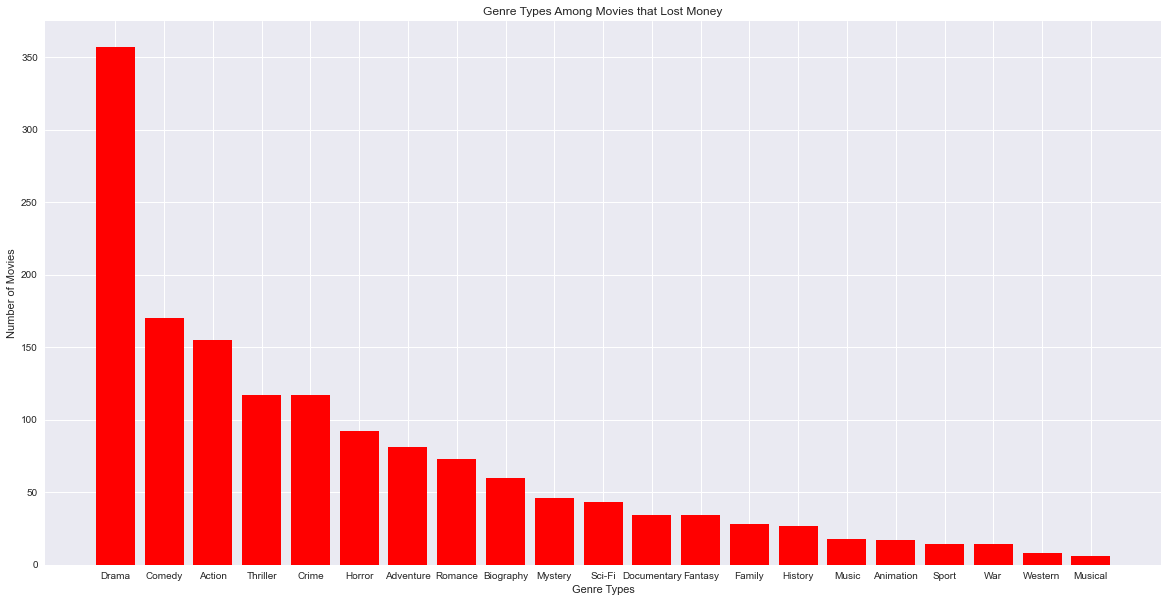

In [91]:
#GENRE TYPES AMONG MOVIES THAT LOST MONEY
df = loss_genre_df

fig, ax = plt.subplots(figsize = (20,10))

ax.bar(x=df['index'], height=df['total'], color='red')


ax.set_xlabel('Genre Types')
ax.set_ylabel('Number of Movies')
ax.set_title('Genre Types Among Movies that Lost Money');


KeyError: 'difference'

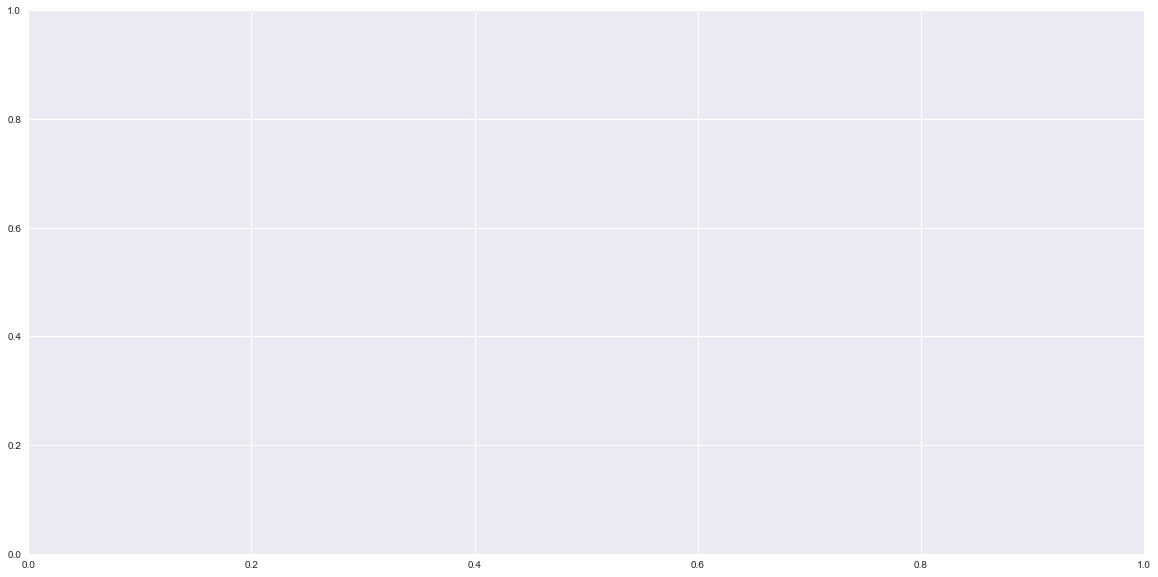

In [104]:
#Visualization for genre comparison dataframes. Doesn't work because i got rid of Difference column.

df = genre_comparison_df

fig, ax = plt.subplots(figsize = (20,10))

ax.bar(x=df['index'], height=df['difference'],  color=(df['difference'] >= .50).map({True: 'g',
                                                    False: 'r'}))


ax.set_xlabel('Genre Types', size=20)
ax.set_ylabel('Number of Movies', size=20)
ax.set_title('Genre Types Among Movies', size=20);


In [92]:
#FIXES FORMATING FOR DOLLAR AMOUNTS IN VISUALIZATIONS
#USE ax.yaxis.set_major_formatter(price_fmt_mill)
from matplotlib.ticker import FuncFormatter

def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    return f"${x*1e-6:,}M"

# Create the formatter
price_fmt_mill =FuncFormatter(millions)


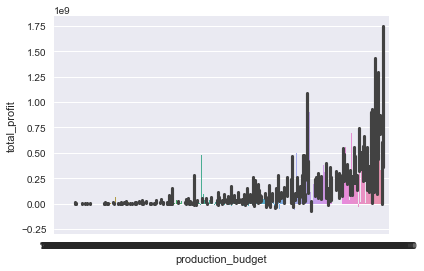

In [93]:
#attempting a visualization
sns.barplot(data=recent_movies_2010, x="production_budget", y="total_profit");

In [95]:
#creating a variable for all movies 1980-2019
recent_movies_2 = project_analysis_df
recent_movies_2 = recent_movies_2[recent_movies_2['release_year'] >= 1990]
recent_movies_2 = recent_movies_2[recent_movies_2['release_year'] < 2019]
recent_movies_2.sort_values('release_year', ascending=True).head(3)

,movie,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes,genre_1,genre_2,genre_3
869,Flatliners,1990,"26,000,000","35,308,153",1,5,"33,752",109,Drama,Horror,Mystery
4237,The Adventures of Ford Fairlane,1990,"49,000,000","-28,576,611",-1,nan,nan,nan,NaN,NaN,NaN
3395,The Godfather: Part III,1990,"54,000,000","12,520,529",0,nan,nan,nan,NaN,NaN,NaN


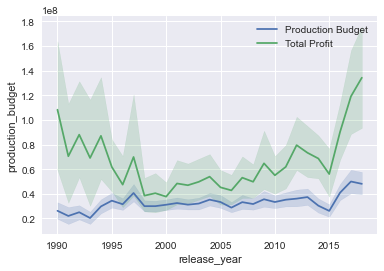

In [96]:
#attempting to show production budget, total profit, and ROI over time.
sns.lineplot(x="release_year", y="production_budget", data=recent_movies_2, label="Production Budget")
sns.lineplot(x="release_year", y="total_profit", data=recent_movies_2, label="Total Profit")

plt.show();

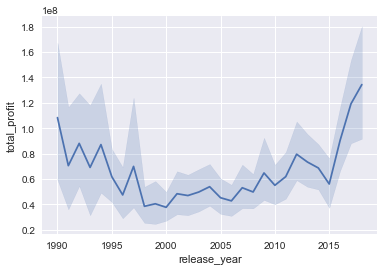

In [102]:
#another attempt
sns.lineplot(x="release_year", y="total_profit", data=recent_movies_2)
plt.show()

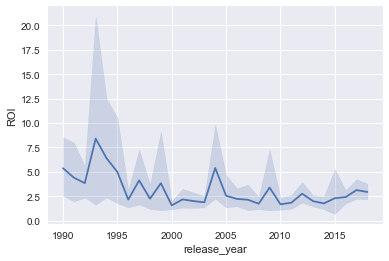

In [103]:
#another attempt
sns.lineplot(x="release_year", y="ROI", data=recent_movies_2)
plt.show()

TypeError: plot got an unexpected keyword argument 'y'

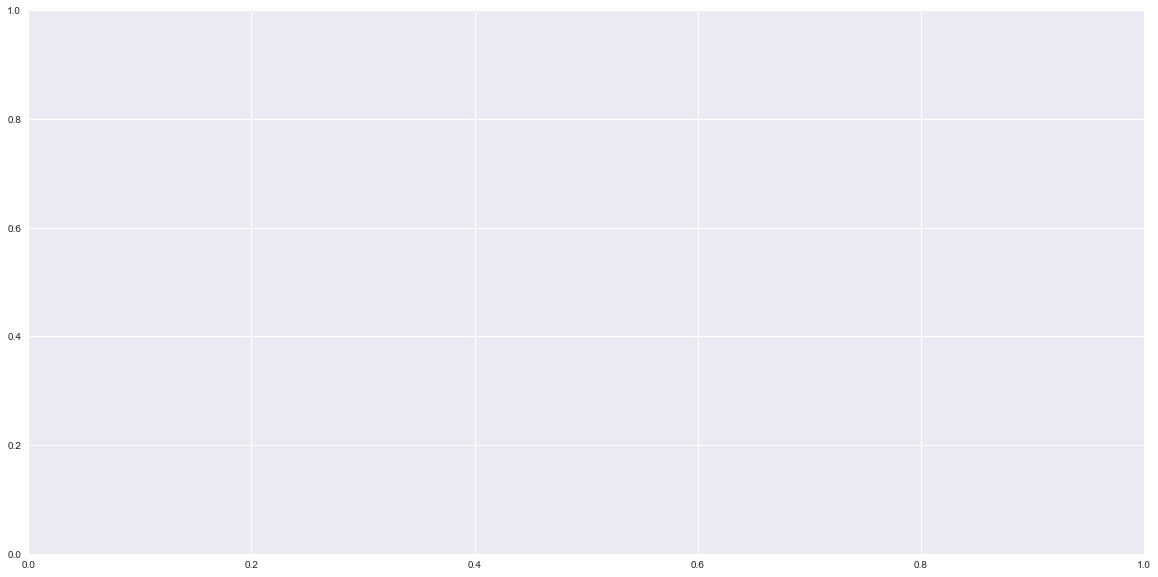

In [97]:
df = recent_movies_2

fig, ax = plt.subplots(figsize = (20,10))

ax.plot(df['release_year'],y = df['production_budget'])

ax.set_xlabel('Release Year')
ax.set_ylabel('Production Budget')
ax.set_title('Insert Title Here');


In [ ]:
#Attempting to plot my findings from the two recent movie datasets. 

df = recent_movies_2

# Set up plot
fig, ax = plt.subplots(figsize=(20,10))

# release year vs. profit
ax.bar(df["release_year"], df["total_profit"], color="purple")
ax.set_title("total profit by year", size=20)
ax.yaxis.set_major_formatter(price_fmt_mill)
ax.set_xlabel("Release Year", size=20)
ax.set_ylabel("Total Profit", size=20);

In [ ]:
df = recent_movies_2

fig, ax = plt.subplots(figsize = (20,10))

ax.scatter(df['production_budget'], df['total_profit'])


ax.set_xlabel('Production Budget')
ax.set_ylabel('Total Profit (in $millions)')
ax.set_title('correlation between budget and profit')
ax.yaxis.set_major_formatter(price_fmt_mill)
plt.tight_layout()

In [ ]:
df = recent_movies_2

fig, ax = plt.subplots(figsize = (20,10))

ax.scatter(df['production_budget'], df['ROI'])


ax.set_xlabel('Production Budget')
ax.set_ylabel('ROI')
ax.set_title('correlation between budget and ROI')
plt.tight_layout()

### Visualizations for 2010-2019

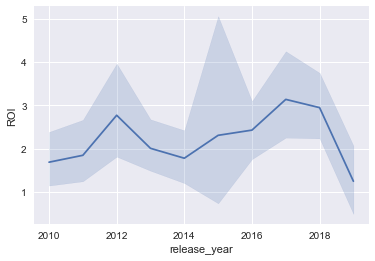

In [98]:
sns.lineplot(x="release_year", y="ROI", data=recent_movies_2010)
plt.show()

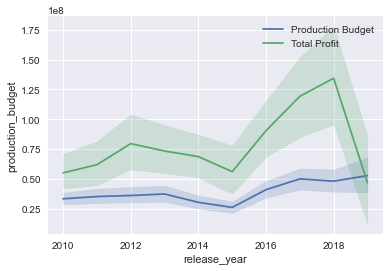

In [99]:
sns.lineplot(x="release_year", y="production_budget", data=recent_movies_2010, label="Production Budget")
sns.lineplot(x="release_year", y="total_profit", data=recent_movies_2010, label="Total Profit")
plt.show();

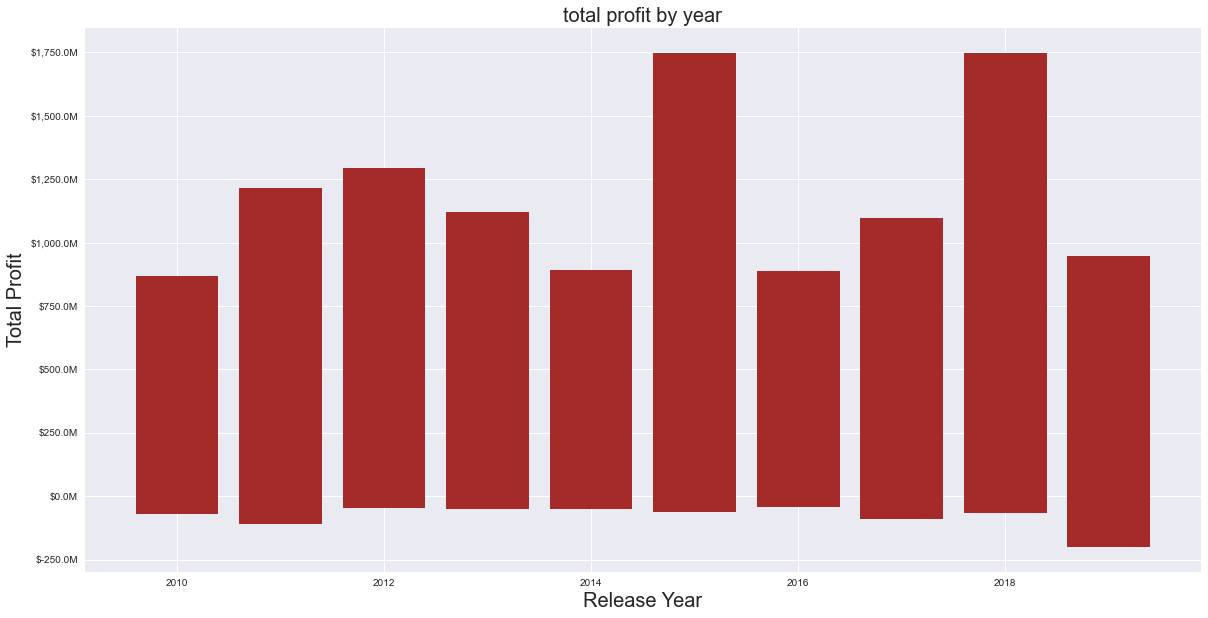

In [144]:
df = recent_movies_2010

# Set up plot
fig, ax = plt.subplots(figsize=(20,10))

# release year vs. profit
ax.bar(df["release_year"], df["total_profit"], color="brown")
ax.set_title("total profit by year", size=20)
ax.yaxis.set_major_formatter(price_fmt_mill)
ax.set_xlabel("Release Year", size=20)
ax.set_ylabel("Total Profit", size=20);

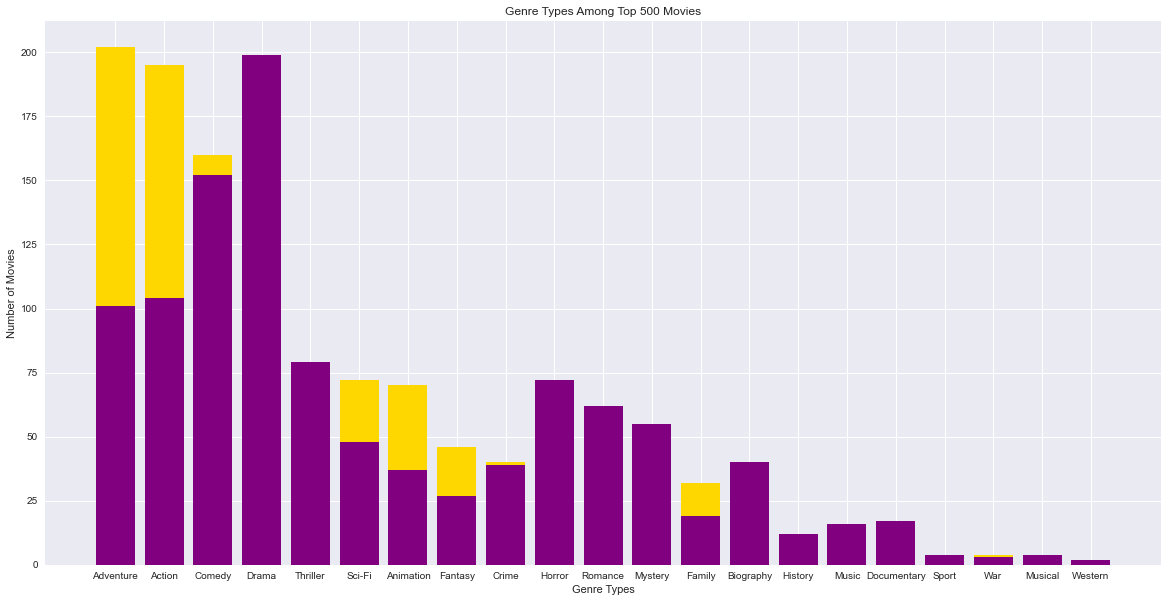

In [141]:
#attempting to show roi and profit
df =genre_df_merged

fig, ax = plt.subplots(figsize = (20,10))

ax.bar(x=df['index'], height=df['profit_genres'], color='gold')
ax.bar(x=df['index'], height=df['roi_genres'], color='purple')


ax.set_xlabel('Genre Types')
ax.set_ylabel('Number of Movies')
ax.set_title('Genre Types Among Top 500 Movies');


## Data Analysis
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

###  What I did.

There were two main components of data that I was interested in. The first was Financial data, specificially, how much
did it cost to make the movie and how much money did it make at the box office. The second was information on what genre (or genres) the best performing movies had.

The Numbers dataset had the financial information that I needed. I was able to use the provided production budget and worldwide gross to calculate the total profit or loss for each movie. 

I then merged all the IMDB datasets into a master data set using the IMDB ID (tconst) as a primary key. There was a lot of extra data there that I didn't end up using, but it did provide the primary title and orginial title, which I could use to link to The Numbers.

### Limitations of the data:

Most of the genre data that I have is from 2010 - 2019. While I would have liked to have consistent genre data for all of the movies, this data is from the most relevant movies for answering the business problem. Microsoft wants data on what types of movies are performing well NOW, so this data was very valuable. I was still able to get financial data for movies from previous years, so it all worked to paint a good picture of the movie industry.

### Challenges along the way (and how I dealt with them):

The biggest challenge that I faced was merging the IMDB data with data from The Numbers. While both provided titles for each movie, there was a little descrepency with some more common titles. Most notably, Avatar, the highest grossing movie in the dataset, was being linked with a low budget horror movie of the same name. I was able to correctly merge the data by using both the primary title and original title from IMDB to determine which was correct. Also, dropping duplicates resolved a lot of the problems.

Another challenge was that the genre field on the IMDB dataset had up to 3 genres all contained together in one string, making it hard to search the data. I was able to create a function which seperated this string into 3 seperate genre fields, as well counting the occurances of each genre through value counts.